The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs. THe GPDs are reconstructed using the expansion in conformal partial waves and pertinent Mellin-Barnes integrals to resum their expansion in conformal moments.

In [4]:
# Import necessary libraries and set display options
import numpy as np
# import mpmath as mp
# import matplotlib.pyplot as plt
# from scipy.integrate import quad, trapezoid
# from joblib import Parallel, delayed
# from scipy.special import gamma, digamma

# import time
# import re
# import os

# from mstw_pdf import (
#     plot_uv_minus_dv_pdf, 
#     plot_uv_plus_dv_plus_S_pdf,
#     plot_gluon_pdf
# )

# from aac_pdf import(
#     plot_polarized_uv_minus_dv_pdf,
#     plot_polarized_uv_plus_dv_plus_S_pdf,
#     plot_polarized_gluon_pdf
#     )

from stringy_gpds import (
    plot_gpds,plot_gpd_data,
    plot_moments_on_grid,plot_moment,
    evolve_conformal_moment,first_singlet_moment,
    evolve_singlet_D,gluon_helicity,
    quark_helicity, spin_orbit_corelation, total_spin,
    orbital_angular_momentum,
    plot_fourier_transform_singlet_helicity,
    plot_fourier_transform_quark_helicity,
    plot_fourier_transform_quark_spin_orbit_correlation,
    plot_fourier_transform_singlet_spin_orbit_correlation,
    plot_fourier_transform_quark_orbital_angular_momentum,
    plot_fourier_transform_transverse_moments,
    plot_spin_orbit_correlation
)
# Set display options
np.set_printoptions(linewidth=200)

In [ ]:
from stringy_gpds import generate_moment_table
import config as cfg
import importlib
from itertools import product

def update_param(filename, key, new_value):
    with open(filename, 'r') as file:
        lines = file.readlines()

    with open(filename, 'w') as file:
        for line in lines:
            if line.strip().startswith(f"{key} ="):
                file.write(f"{key} = {repr(new_value)}\n")
            else:
                file.write(line)
def generate_moment_table_all():
    mod = False
    for moment_type, moment_label, evolution_order, error_type in product(cfg.MOMENTS, cfg.LABELS, cfg.ORDERS,cfg.ERRORS):
        for eta, t, mu in zip(cfg.ETA_ARRAY, cfg.T_ARRAY, cfg.MU_ARRAY):
            if mu != 1 and not mod:
                print('Reloading module to interpolate input moments')
                update_param(cfg.BASE_PATH / 'config.py','INTERPOLATE_INPUT_MOMENTS',True)
            print(eta,t,mu,moment_type,moment_label,evolution_order,error_type)

generate_moment_table_all()

# for moment_label in cfg.LABELS:
#     for eta, t, mu in zip(cfg.ETA_ARRAY, cfg.T_ARRAY, cfg.MU_ARRAY):
#         if mu == 1:
#             continue
#         print(f"{moment_label} at (eta,t,mu)={eta,t,mu}")
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

0 -0.69 1 non_singlet_isovector Atilde NLO central
0 -0.39 1 non_singlet_isovector Atilde NLO central
0.33 -0.69 1 non_singlet_isovector Atilde NLO central
0.1 -0.23 1 non_singlet_isovector Atilde NLO central
0 -0.69 2 non_singlet_isovector Atilde NLO central
Reloading module to interpolate input moments


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/config.py'

In [ ]:
from stringy_gpds import singlet_moment, non_singlet_isovector_moment, generate_moment_table, get_j_base
import time
from helpers import build_moment_interpolator
import config as cfg

# First generate input moments, then switch to interpolation of input moments
evolution_order = "NLO"
moment_type = "non_singlet_isovector"
particle = "quark"
solution = "."
# for moment_label in cfg.LABELS:
#     for eta, t, mu in zip(cfg.ETA_ARRAY, cfg.T_ARRAY, cfg.MU_ARRAY):
#         if mu != 1:
#             continue
#         print(f"{moment_label} at (eta,t,mu)={eta,t,mu}")
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
#         generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# moment_type = "non_singlet_isoscalar"
# solution = "."
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# moment_type = "singlet"
# solution = "+"
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# moment_type = "singlet"
# solution = "-"
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# Switch to interpolation of input moments
for moment_label in cfg.LABELS:
    for eta, t, mu in zip(cfg.ETA_ARRAY, cfg.T_ARRAY, cfg.MU_ARRAY):
        if mu == 1:
            continue
        print(f"{moment_label} at (eta,t,mu)={eta,t,mu}")
        generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
        generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
        generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# particle = "quark"
# moment_type = "non_singlet_isoscalar"
# solution = "."
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# particle = "quark"
# moment_type = "singlet"
# solution = "."
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

# particle = "gluon"
# moment_type = "singlet"
# solution = "."
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="central",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="plus",step=.1)
# generate_moment_table(eta,t,mu,Nf=3,solution=solution,particle=particle,moment_type=moment_type,moment_label=moment_label,evolution_order=evolution_order,error_type="minus",step=.1)

Atilde at (eta,t,mu)=(0, -0.69, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:03<00:00, 32.40it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_069_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:56<00:00, 34.46it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_069_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:53<00:00, 35.20it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_069_200_minus.csv
Atilde at (eta,t,mu)=(0, -0.39, 3)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:31<00:00, 43.69it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_039_300.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:13<00:00, 29.99it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_039_300_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:45<00:00, 38.02it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_000_039_300_minus.csv
Atilde at (eta,t,mu)=(0.33, -0.69, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:01<00:00, 32.99it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_033_069_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:07<00:00, 31.45it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_033_069_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:34<00:00, 42.37it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_033_069_200_minus.csv
Atilde at (eta,t,mu)=(0.1, -0.23, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:10<00:00, 30.62it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_010_023_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:07<00:00, 31.31it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_010_023_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:41<00:00, 39.64it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_Atilde_NLO_010_023_200_minus.csv
B at (eta,t,mu)=(0, -0.69, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:52<00:00, 35.73it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_069_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:12<00:00, 30.12it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_069_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:57<00:00, 34.00it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_069_200_minus.csv
B at (eta,t,mu)=(0, -0.39, 3)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:53<00:00, 35.25it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_039_300.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:15<00:00, 29.58it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_039_300_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:46<00:00, 37.45it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_000_039_300_minus.csv
B at (eta,t,mu)=(0.33, -0.69, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:02<00:00, 32.66it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_033_069_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:06<00:00, 31.62it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_033_069_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:13<00:00, 30.06it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_033_069_200_minus.csv
B at (eta,t,mu)=(0.1, -0.23, 2)


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:47<00:00, 23.96it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_010_023_200.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [02:06<00:00, 31.73it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_010_023_200_plus.csv


100%|███████████████████████████████████████████████████████████████████████████████| 4004/4004 [01:37<00:00, 41.02it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/InterpolationTables/non_singlet_isovector_quark_moments_B_NLO_010_023_200_minus.csv


In [18]:
from fit import dipole_fit_moment
plot_fit = False
evolution_order = "LO"
# for error_type in ["central","plus","minus"]:
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(3,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(3,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(4,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(4,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="B",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(3,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(3,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(4,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(4,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="A",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)


#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isovector",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(2,0,2,particle="quark",moment_type="non_singlet_isoscalar",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="quark",moment_type="singlet",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)
#     dipole_fit_moment(1,0,2,particle="gluon",moment_type="singlet",moment_label="Atilde",evolution_order=evolution_order,error_type=error_type,plot_fit=plot_fit)

Time for initial sampling for parameters (eta,t,mu) = ((0, -0.69, 2)): 8.768254 seconds


100%|███████████████████████████████████████████████████████████████████████████████████| 51/51 [00:02<00:00, 17.66it/s]


Time for plot computation for parameters (eta,t,mu) = ((0, -0.69, 2)): 8.688273 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_069_200.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_069_200_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_069_200_minus.csv
Time for initial sampling for parameters (eta,t,mu) = ((0, -0.39, 3)): 0.896173 seconds


100%|███████████████████████████████████████████████████████████████████████████████████| 51/51 [00:03<00:00, 16.45it/s]


Time for plot computation for parameters (eta,t,mu) = ((0, -0.39, 3)): 9.078568 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_039_300.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_039_300_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_000_039_300_minus.csv
Time for initial sampling for parameters (eta,t,mu) = ((0.33, -0.69, 2)): 2.143739 seconds


100%|███████████████████████████████████████████████████████████████████████████████████| 52/52 [00:05<00:00,  8.68it/s]


Time for plot computation for parameters (eta,t,mu) = ((0.33, -0.69, 2)): 16.410025 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_033_069_200.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_033_069_200_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_Htilde_NLO_033_069_200_minus.csv
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isovector_quark_GPD_Htilde.pdf


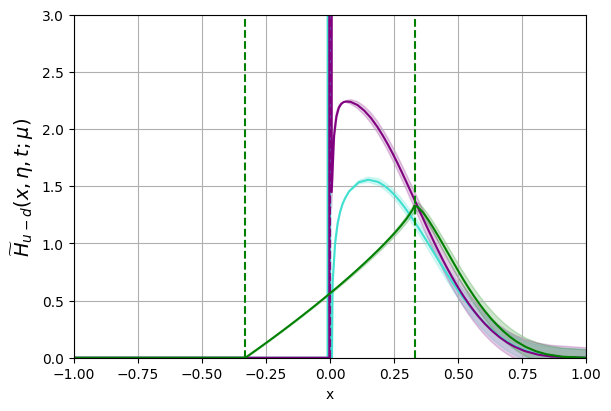

In [2]:
from stringy_gpds import plot_gpds
eta_array = [0,0,0.33]
t_array = [-0.69,-0.39,-0.69]
mu_array = [2,3,2]
colors = ["turquoise","purple","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isovector",gpd_label="Htilde",evolution_order="NLO",error_bars=True, read_from_file= False,write_to_file=True, y_0=0, y_1=3)

Time for initial sampling for parameters (eta,t,mu) = ((0, -0.69, 2)): 1.168239 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 101/101 [00:07<00:00, 12.67it/s]


Time for plot computation for parameters (eta,t,mu) = ((0, -0.69, 2)): 25.579479 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_000_069_200.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_000_069_200_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_000_069_200_minus.csv
Time for initial sampling for parameters (eta,t,mu) = ((0.33, -0.69, 2)): 2.764858 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 102/102 [00:13<00:00,  7.56it/s]


Time for plot computation for parameters (eta,t,mu) = ((0.33, -0.69, 2)): 38.793075 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_033_069_200.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_033_069_200_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_033_069_200_minus.csv
Time for initial sampling for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 2.533017 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 102/102 [00:16<00:00,  6.36it/s]


Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 43.204751 seconds
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_010_023_200.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_010_023_200_plus.csv
Saved data to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/GPDs/non_singlet_isovector_quark_GPD_E_NLO_010_023_200_minus.csv
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isovector_quark_GPD_E.pdf


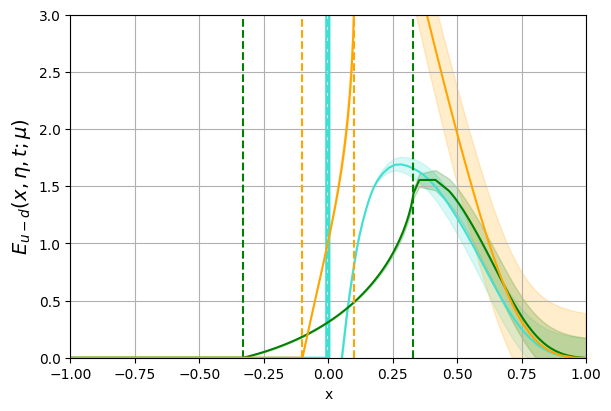

In [3]:
from stringy_gpds import plot_gpds
eta_array = [0,0.33,0.1]
t_array = [-0.69,-0.69,-0.23]
mu_array = [2,2,2]
colors = ["turquoise","green","orange"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",evolution_order="NLO",error_bars=True, read_from_file= False,write_to_file=True, y_0=0, y_1=3,n_points=100)

In [3]:
j_u_minus_d, j_u_minus_d_plus, j_u_minus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isovector")
j_u_plus_d, j_u_plus_d_plus, j_u_plus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isoscalar")
j_u = (j_u_minus_d + j_u_plus_d)/2
j_d = (j_u_plus_d - j_u_minus_d)/2
j_u_plus = np.sqrt(j_u_minus_d_plus**2+j_u_plus_d_plus**2)/2
j_u_minus = np.sqrt(j_u_minus_d_minus**2+j_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(j_u_plus_d,j_u_plus_d_plus,j_u_plus_d_minus)
print(j_u_minus_d,j_u_minus_d_plus,j_u_minus_d_minus)
print(j_u,j_d)
print(j_u_plus,j_u_minus)
# print(l_u+l_d+l_s)

0.17089890717084838 0.02185827594749296 0.020865769369075665
0.4208675673440858 0.08602358143137934 0.08211755651547331
0.2958832372574671 -0.12498433008661872
0.04437860066991156 0.042363526232584235


Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.011715 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.012970 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.009802 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/singlet_quark_GPD_Htilde.pdf


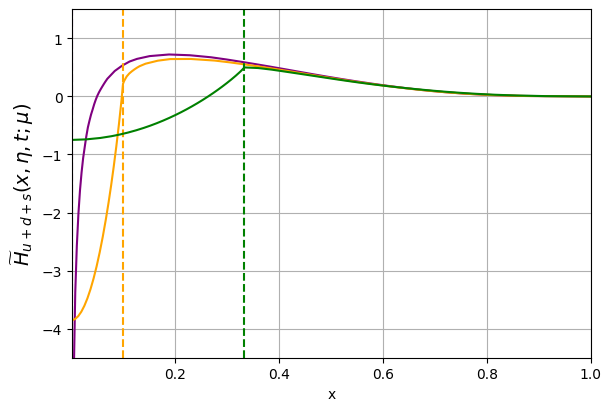

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="singlet",gpd_label="Htilde",error_bars=False, read_from_file= True,write_to_file=False, y_0= -4.5, y_1 =1.5)

Plots of conformal moments $\mathbb{G}(n,\eta,tb_\perp)$ in momentum space

In [10]:
from stringy_gpds import plot_fourier_transform_singlet_spin_orbit_correlation
# plot_fourier_transform_singlet_spin_orbit_correlation(0,2,particle="gluon",read_from_file=False,write_to_file=True,evolution_order="NLO",b_max=4, n_b = 50,Delta_max=8,vmin = -.6, vmax = 0.05 ,ymin=-1.8, ymax = .8)
# plot_fourier_transform_singlet_spin_orbit_correlation(0,2,particle="quark",read_from_file=False,write_to_file=True,evolution_order="NLO",b_max=4, n_b = 50,Delta_max=8,vmin = -.6, vmax = 0.05 ,ymin=-1.8, ymax = .8)

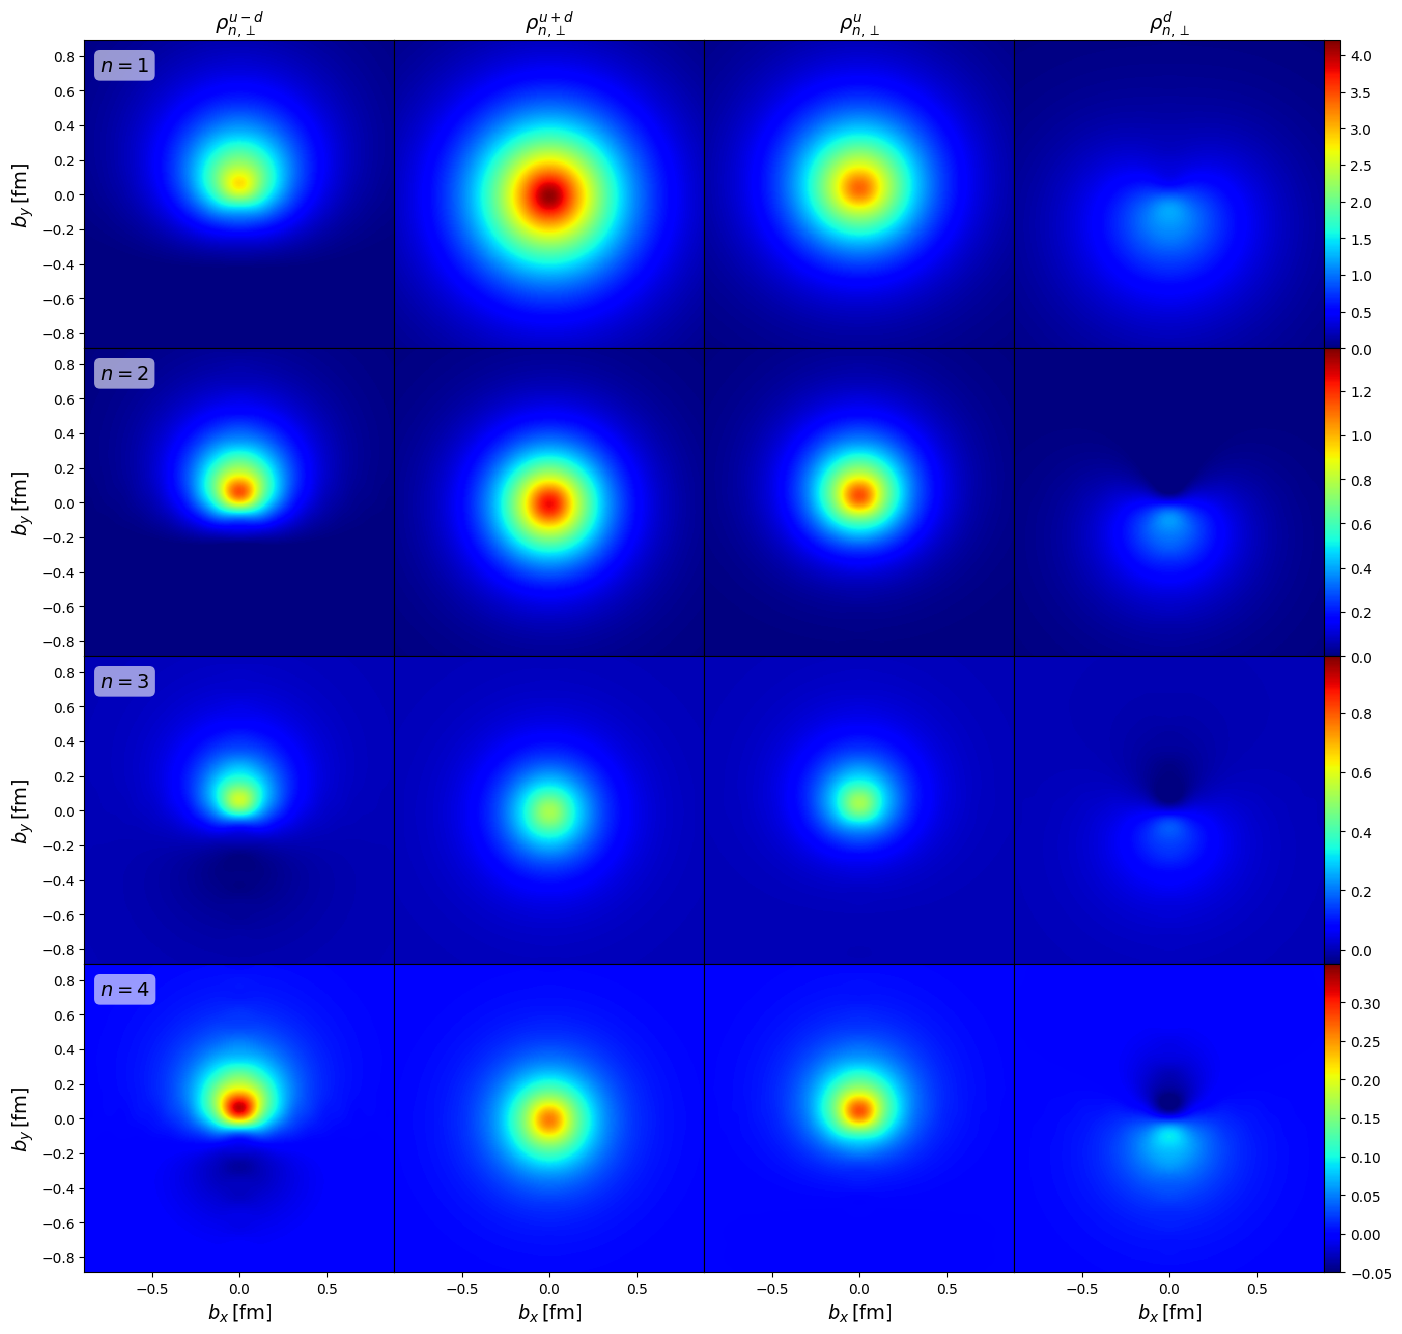

In [2]:
from plot import plot_fourier_transform_transverse_moments_grid
plot_fourier_transform_transverse_moments_grid(4,0,2,vmin=[0,0,-0.05,-0.05],vmax=[4.2,1.39,.99,.349])

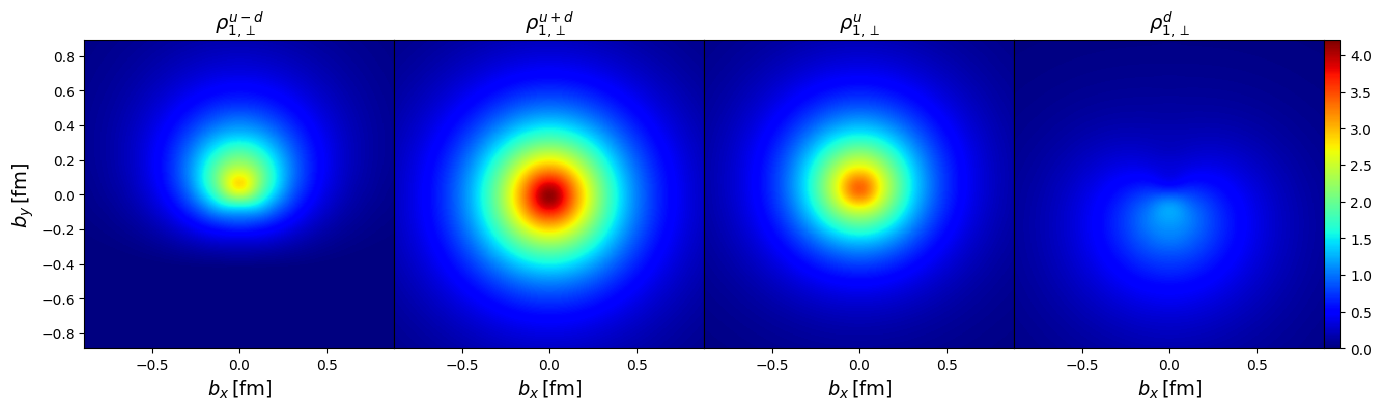

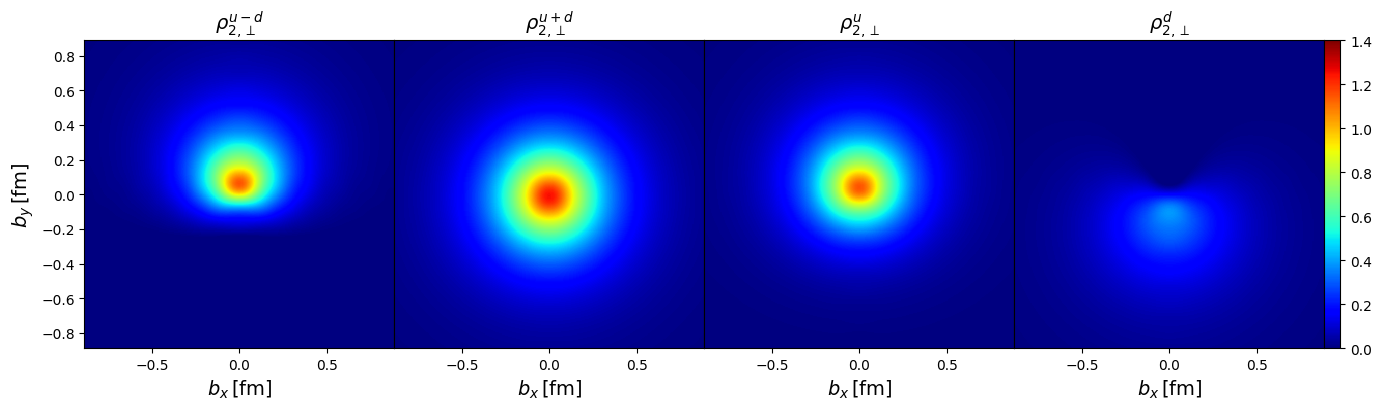

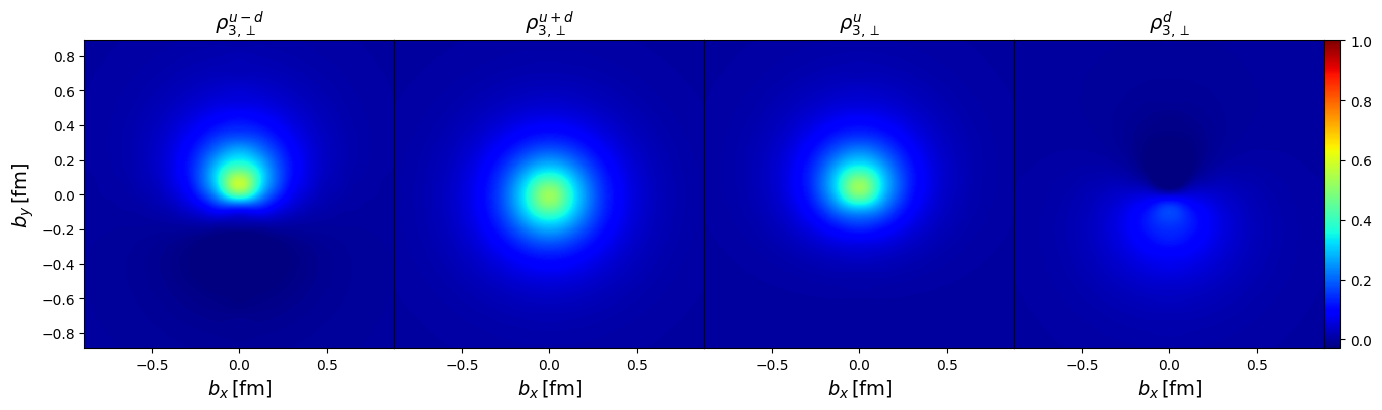

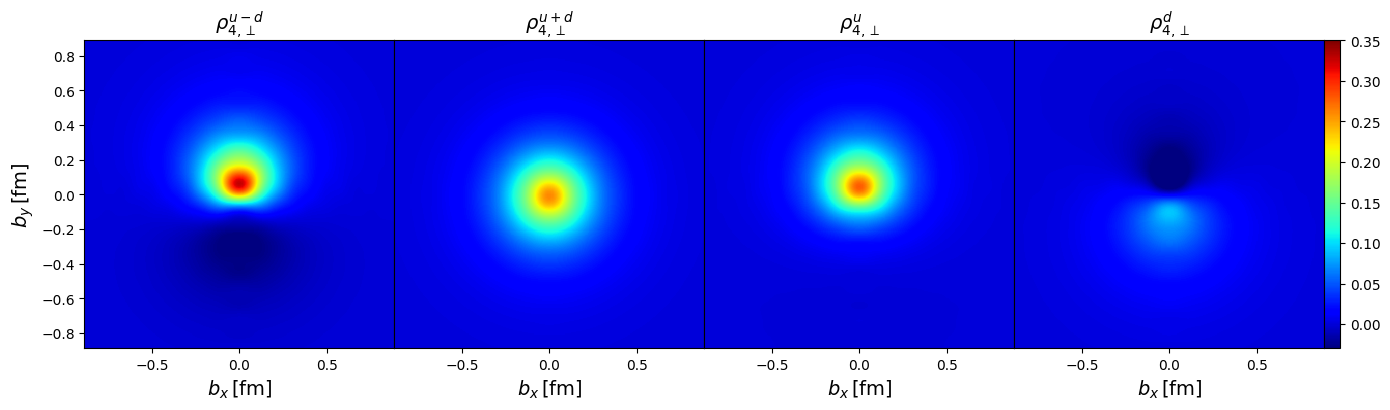

In [21]:
from stringy_gpds import plot_fourier_transform_transverse_moments
plot_fourier_transform_transverse_moments(1,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=4.2,evolution_order="NLO")
plot_fourier_transform_transverse_moments(2,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=1.4,evolution_order="NLO")
plot_fourier_transform_transverse_moments(3,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=1,evolution_order="NLO")
plot_fourier_transform_transverse_moments(4,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.35,evolution_order="NLO")

In [6]:
l_u_minus_d, l_u_minus_d_plus ,l_u_minus_d_minus = orbital_angular_momentum(0,2)
l_u_plus_d, l_u_plus_d_plus ,l_u_plus_d_minus = orbital_angular_momentum(0,2,moment_type="non_singlet_isoscalar")
l_s, _ ,_ = orbital_angular_momentum(0,2,moment_type="singlet")
l_u = (l_u_minus_d + l_u_plus_d)/2
l_d = (l_u_plus_d - l_u_minus_d)/2
l_u_plus = np.sqrt(l_u_minus_d_plus**2+l_u_plus_d_plus**2)/2
l_u_minus = np.sqrt(l_u_minus_d_minus**2+l_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_plus_d,l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_minus_d,l_u_minus_d_plus,l_u_minus_d_minus)
print(l_u,l_d,l_s)
print(l_u_plus,l_u_minus)
# print(l_u+l_d+l_s)

-0.03515109816975892 0.06029649825648719 0.05994383876564187
-0.219103215838246 0.1182642498189208 0.11545418706579208
-0.12712715700400246 0.09197605883424353 0.0152597925474197
0.06637412991374476 0.06504408719665489


In [4]:
s_u_minus_d, s_u_minus_d_plus, s_u_minus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isovector")
s_u_plus_d, s_u_plus_d_plus, s_u_plus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isoscalar")
s_s, s_s_plus, s_s_minus= quark_helicity(0,2,moment_type="singlet")
s_g, s_g_plus, s_g_minus = gluon_helicity(0,2)
s_u = (s_u_plus_d+s_u_minus_d)/2
s_u_plus = np.sqrt(s_u_minus_d_plus**2+s_u_plus_d_plus**2)/2
s_u_minus = np.sqrt(s_u_minus_d_minus**2+s_u_plus_d_minus**2)/2
s_d = (s_u_plus_d-s_u_minus_d)/2
print(s_u_minus_d,s_u_minus_d_minus,s_u_minus_d_plus)
print(s_u_plus_d,s_u_plus_d_plus,s_u_plus_d_minus)
print(s_u,s_u_plus,s_u_minus)
print(s_d,s_u_plus,s_u_minus)
# print(s_s,s_s_plus,s_s_minus)
# print(s_g,s_g_plus,s_g_minus)
# print(s_u+s_d+s_s)
# print(s_g)

0.6399707831823318 0.08115649217992948 0.08115649217992948
0.2060500053406073 0.05619504848825929 0.05619504848825929
0.4230103942614696 0.049356508429863555 0.049356508429863555
-0.21696038892086225 0.049356508429863555 0.049356508429863555


In [5]:
c_u_minus_d, c_u_minus_d_plus, c_u_minus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isovector")
c_u_plus_d, c_u_plus_d_plus, c_u_plus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isoscalar")
c_u = (c_u_plus_d+c_u_minus_d)/2
c_u_plus = np.sqrt(c_u_minus_d_plus**2+c_u_plus_d_plus**2)/2
c_u_minus = np.sqrt(c_u_minus_d_minus**2+c_u_plus_d_minus**2)/2
c_d = (c_u_plus_d-c_u_minus_d)/2
print(c_u_minus_d,c_u_minus_d_minus,c_u_minus_d_plus)
print(c_u_plus_d,c_u_plus_d_plus,c_u_plus_d_minus)
print(c_u,c_u_plus,c_u_minus)
print(c_d,c_u_plus,c_u_minus)

-0.39844253802641905 0.17950598244725235 0.17043054856399925
-1.4625505084866472 0.17010833004615744 0.1792000831518223
-0.9304965232565332 0.12039872905778339 0.12682179183402717
-0.532053985230114 0.12039872905778339 0.12682179183402717


In [ ]:
def total_spin(t,mu):
    j_u_minus_d, j_u_minus_d_plus ,j_u_minus_d_minus= total_spin(t,mu)
    j_u_plus_d, j_u_plus_d_plus , j_u_plus_d_minus = total_spin(t,mu,moment_type="non_singlet_isoscalar")
    j_s, j_s_plus, j_s_minus = total_spin(t,mu,moment_type="singlet")
    j_g, j_g_plus ,j_g_minus = total_spin(t,mu,particle="gluon",moment_type="singlet")

    j_u = (j_u_minus_d+j_u_plus_d)/2
    j_d = (j_u_plus_d-j_u_minus_d)/2
    j_u_plus = np.sqrt((j_u_minus_d_plus)**2+(j_u_plus_d_plus)**2)/2
    j_u_minus = np.sqrt((j_u_minus_d_minus)**2+(j_u_plus_d_minus)**2)/2
    error_plus = np.sqrt(2*j_u_plus**2+j_s_plus**2+j_g_plus**2)
    error_minus= np.sqrt(2*j_u_minus**2+j_s_minus**2+j_g_minus**2)
    print(j_u + j_d + j_s + j_g, f'({error_plus})({error_minus})')

0.368205268227426 (0.0691794005656669)(0.0679402889812622)


In [6]:
from fit import dipole_fit_lattice_moments
for error_type in ["central","plus","minus"]:
    for n in range(1,5):
        # print(n,error_type)
        dipole_fit_lattice_moments(n=n,particle="quark",moment_type="non_singlet_isovector",moment_label="A",pub_id="2305.11117",error_type=error_type)
        dipole_fit_lattice_moments(n=n,particle="quark",moment_type="non_singlet_isoscalar",moment_label="A",pub_id="2305.11117",error_type=error_type)
        dipole_fit_lattice_moments(n=n,particle="quark",moment_type="non_singlet_isovector",moment_label="B",pub_id="2305.11117",error_type=error_type)
        dipole_fit_lattice_moments(n=n,particle="quark",moment_type="non_singlet_isoscalar",moment_label="B",pub_id="2305.11117",error_type=error_type)

In [ ]:
from helpers import load_Lz_data
load_Lz_data("quark","non_singlet_isoscalar","0705.4295","0705.4295","0705.4295")
load_Lz_data("quark","non_singlet_isoscalar","2305.11117","2305.11117","2410.03539")
load_Lz_data("quark","non_singlet_isovector","0705.4295","0705.4295","0705.4295")
load_Lz_data("quark","non_singlet_isovector","2305.11117","2305.11117","2410.03539")

(array([0.107, 0.124, 0.125, 0.219, 0.244, 0.245, 0.254, 0.359, 0.379,
        0.471, 0.473, 0.508, 0.578, 0.615, 0.632]),
 array([-0.0235,  0.129 ,  0.1875,  0.148 ,  0.113 ,  0.067 ,  0.112 ,
         0.079 ,  0.083 ,  0.0575,  0.158 ,  0.0675,  0.0755,  0.076 ,
         0.07  ]),
 array([0.21571161, 0.04716991, 0.07429165, 0.14508101, 0.03808543,
        0.06786015, 0.04775458, 0.03756661, 0.04237039, 0.04313351,
        0.08345208, 0.0466074 , 0.03666402, 0.0445954 , 0.03482815]))

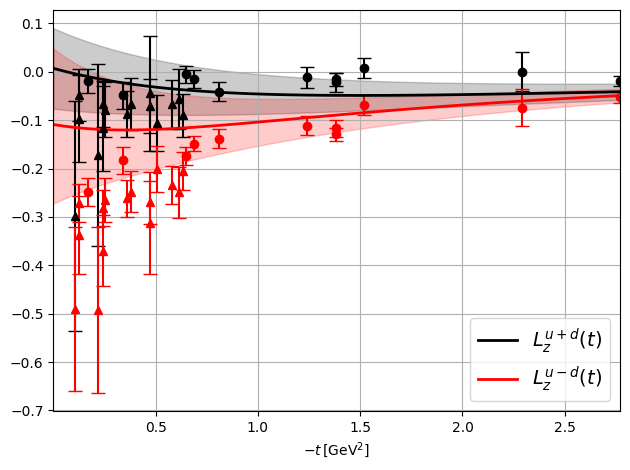

In [1]:
from stringy_gpds import plot_orbital_angular_momentum
plot_orbital_angular_momentum(0,2,evolution_order="NLO")

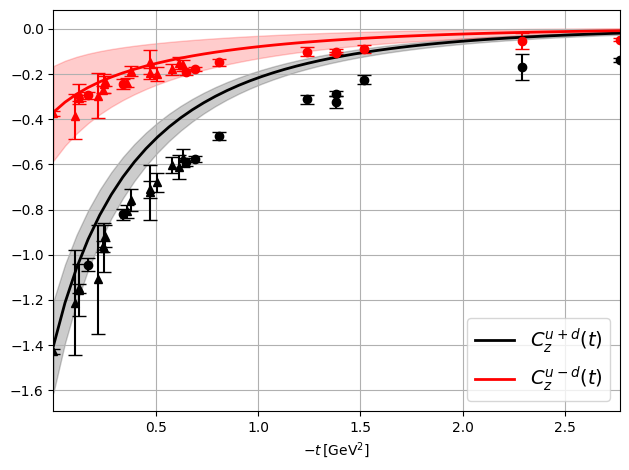

In [1]:
from stringy_gpds import plot_spin_orbit_correlation
plot_spin_orbit_correlation(0,2,evolution_order="NLO")

Plots of conformal moments $\mathbb{G}(n,\eta,t)$ in momentum space

In [8]:
from stringy_gpds import plot_moments_on_grid

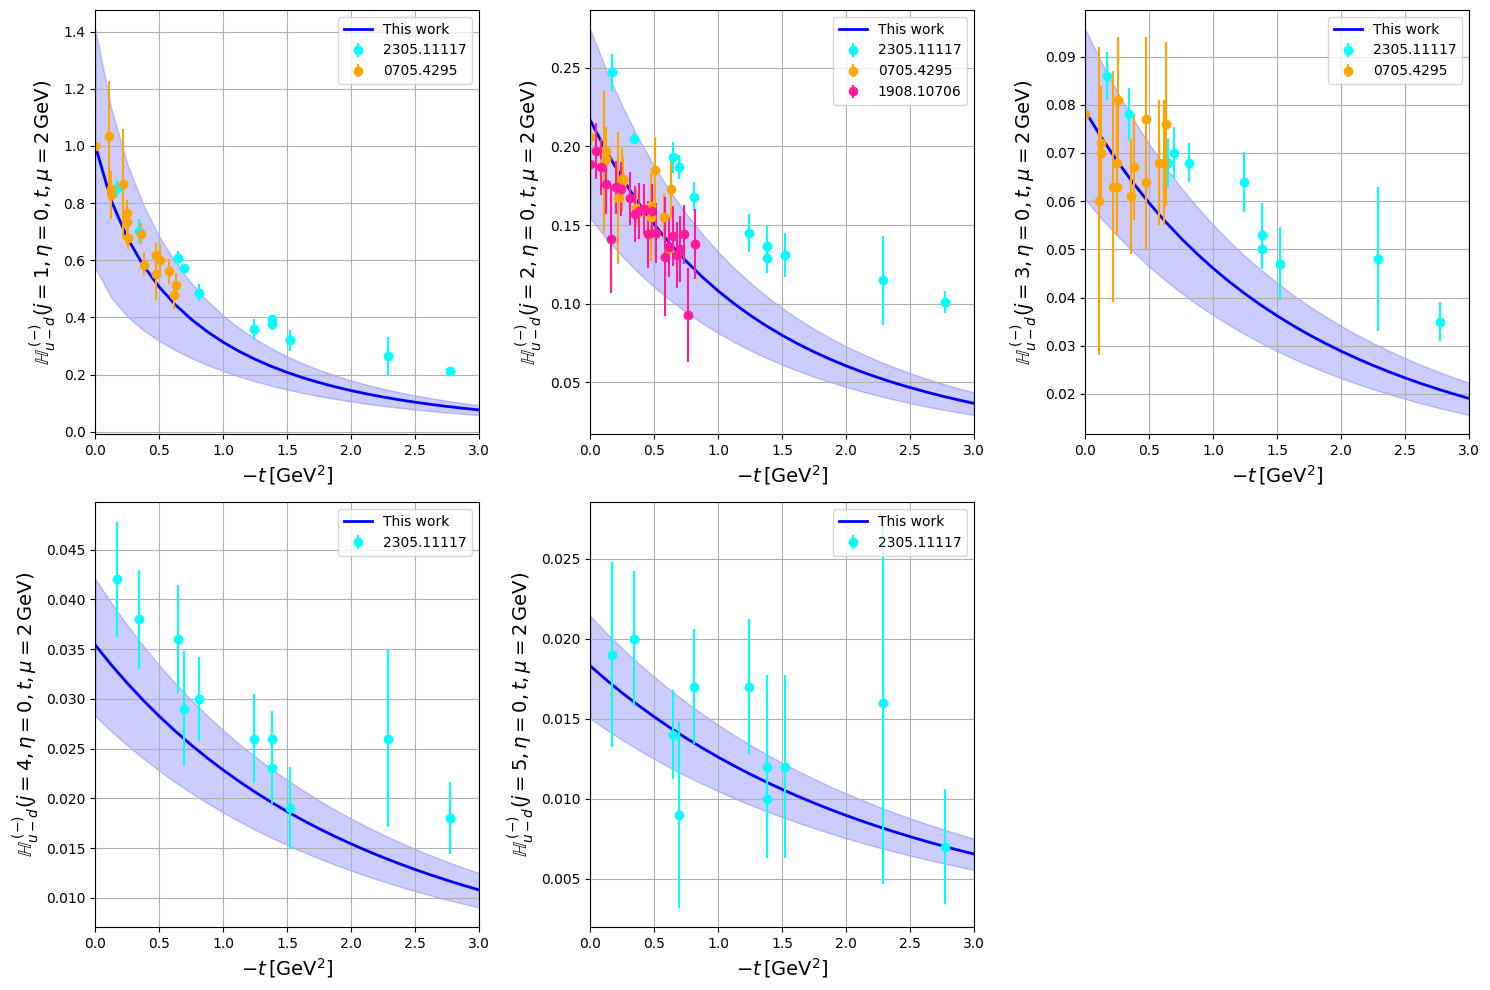

In [2]:
#non_singlet_isovector
y_label = "$\\mathbb{{H}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

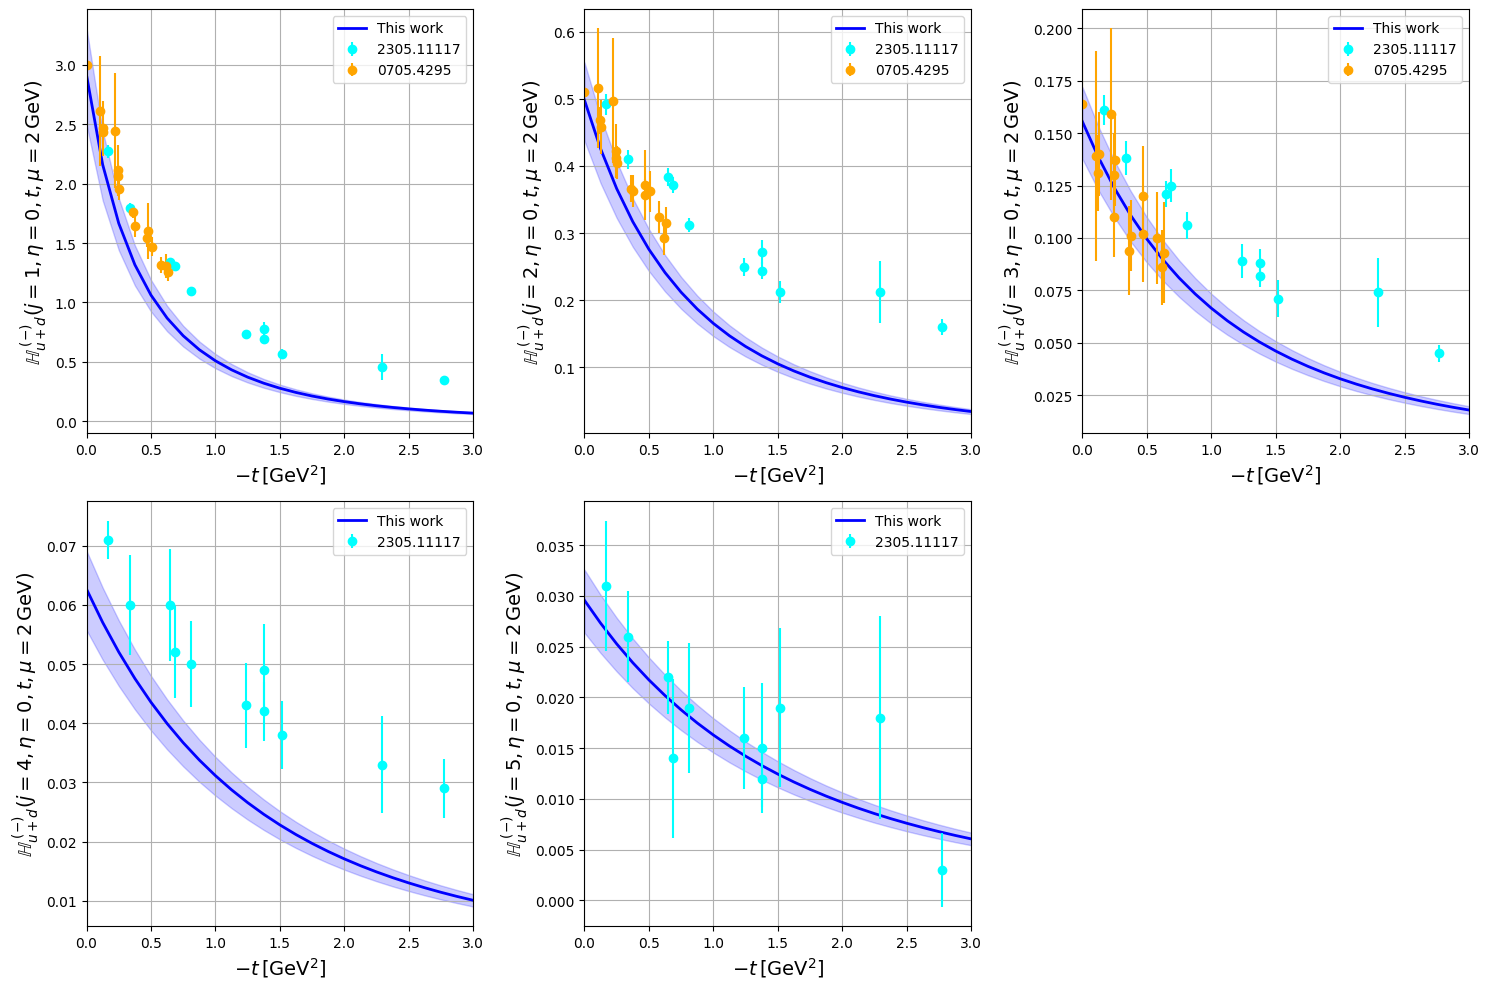

In [3]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{H}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

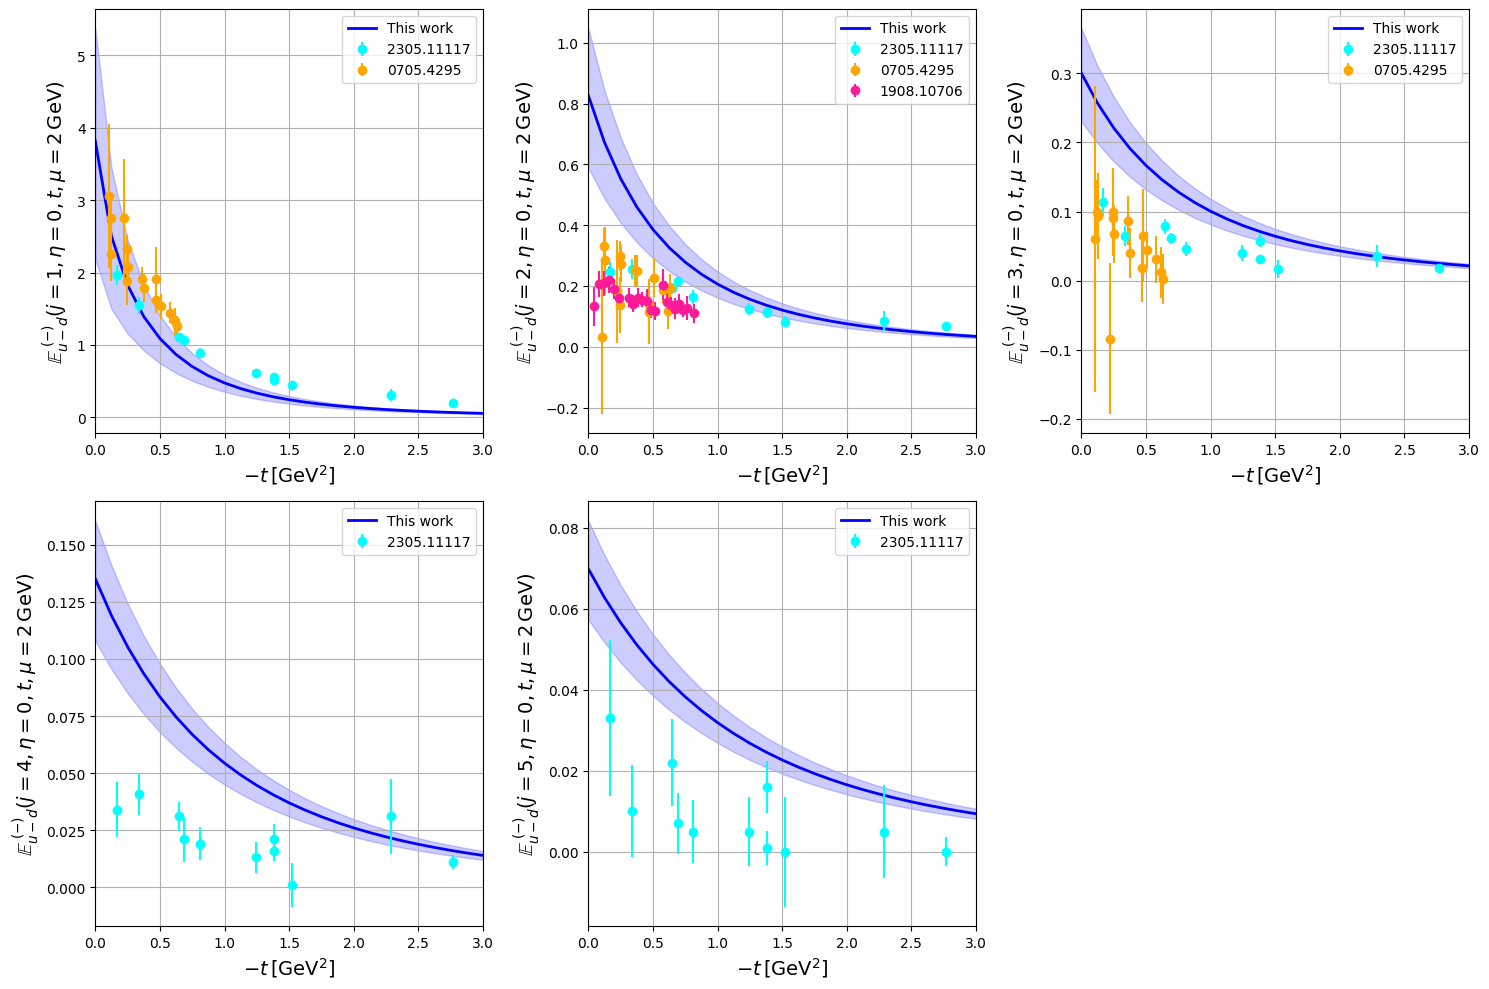

In [4]:
#non_singlet_isovector
y_label = "$\\mathbb{{E}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

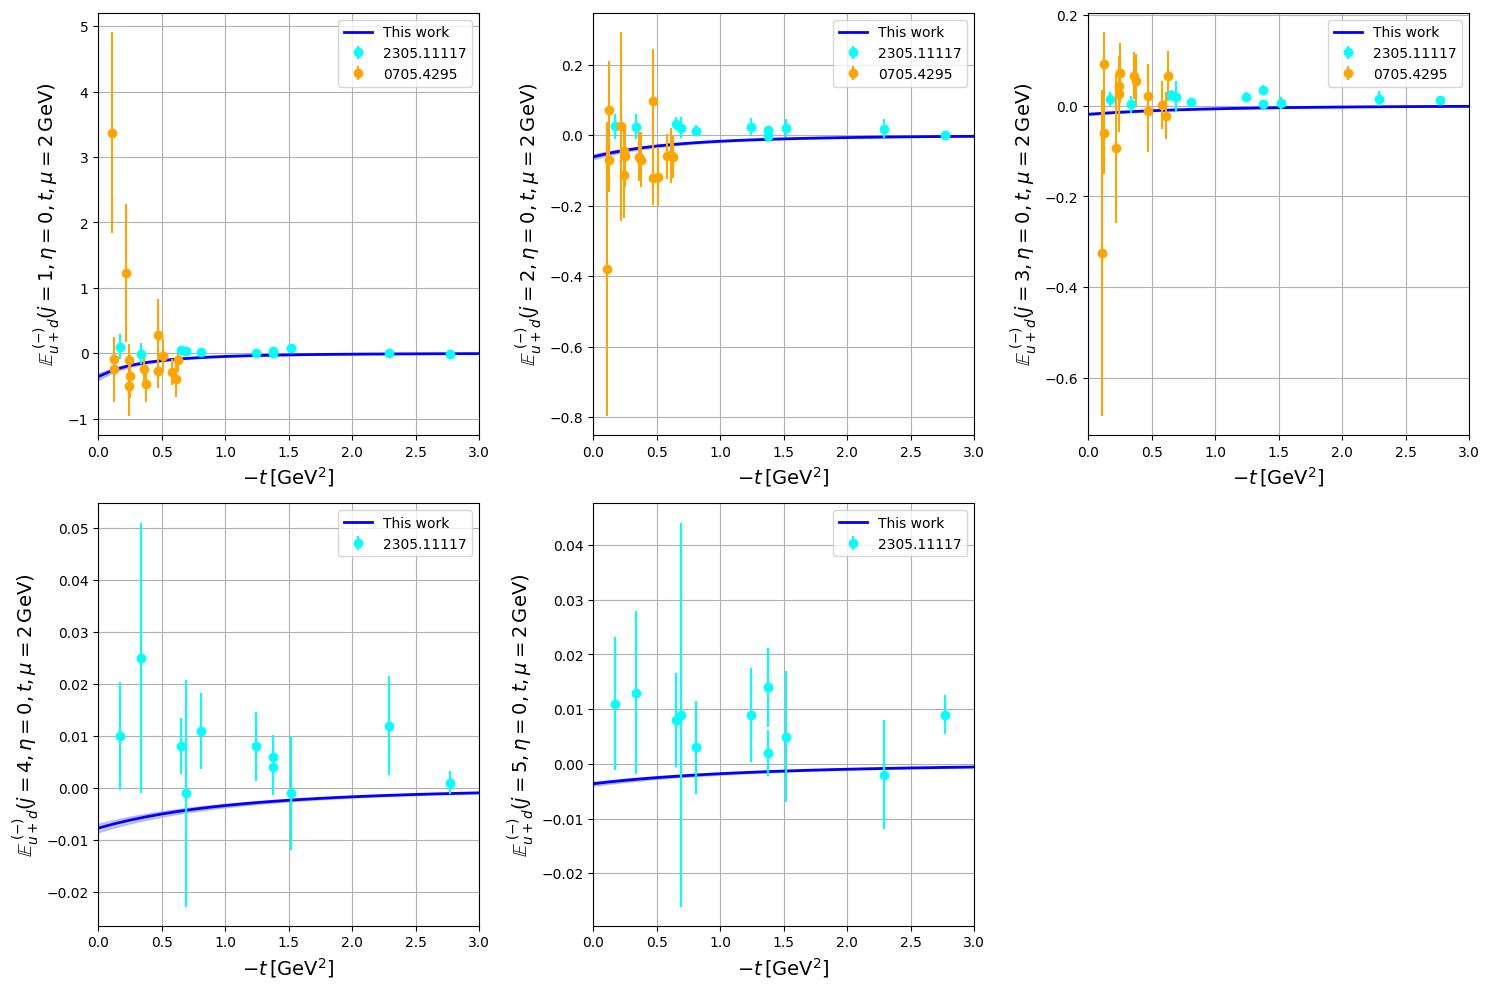

In [5]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{E}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

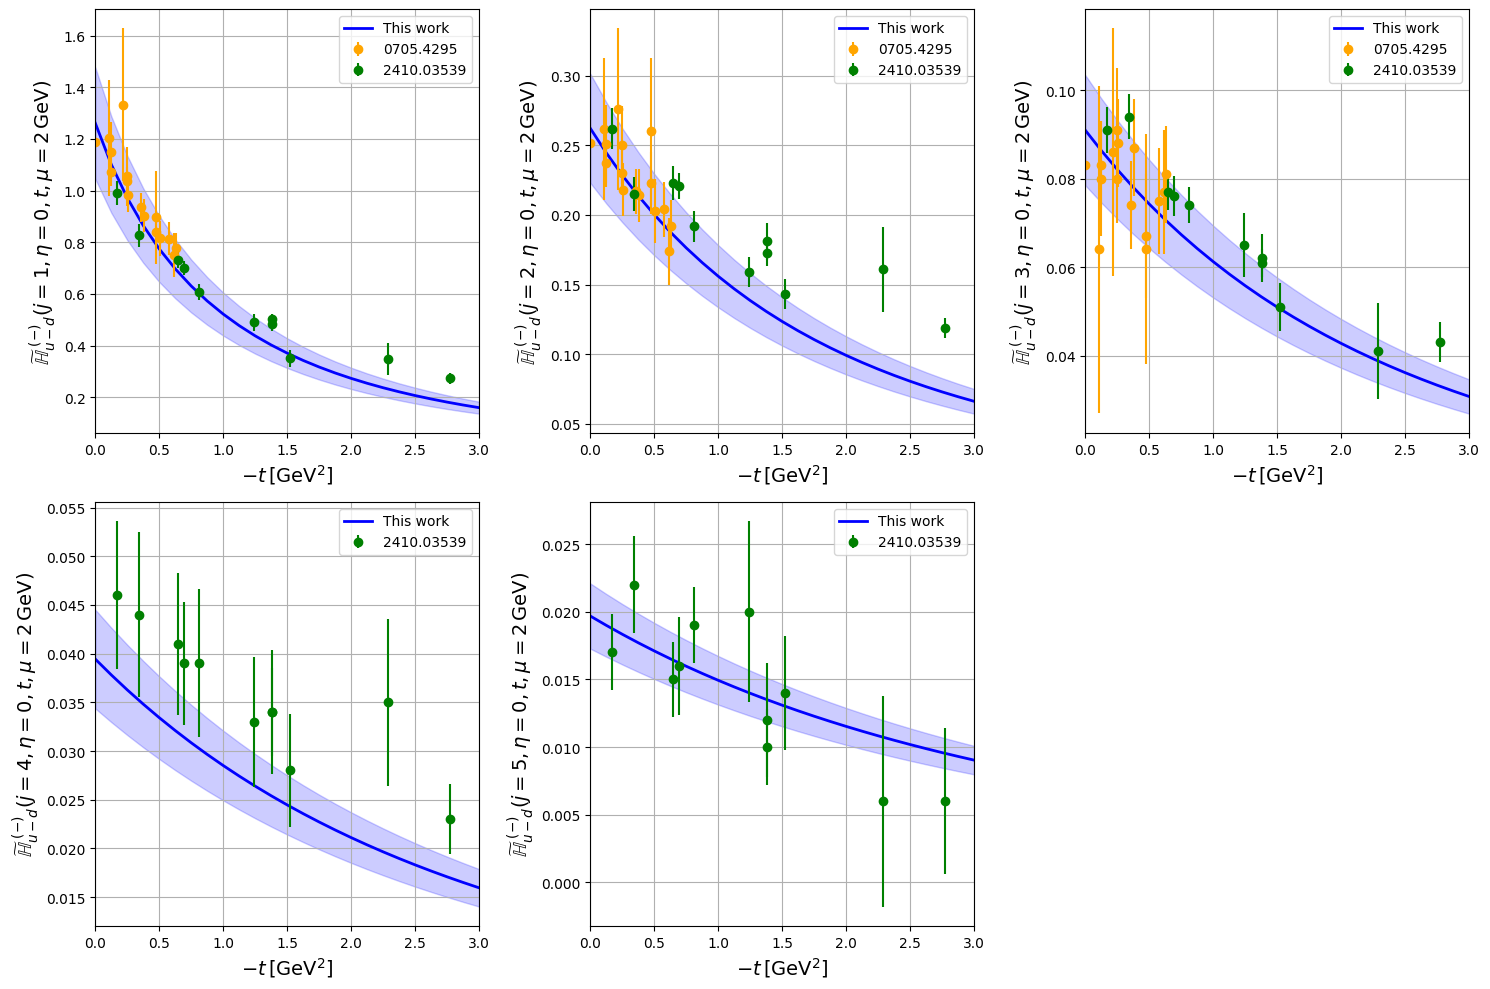

In [6]:
#non_singlet_isovector Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

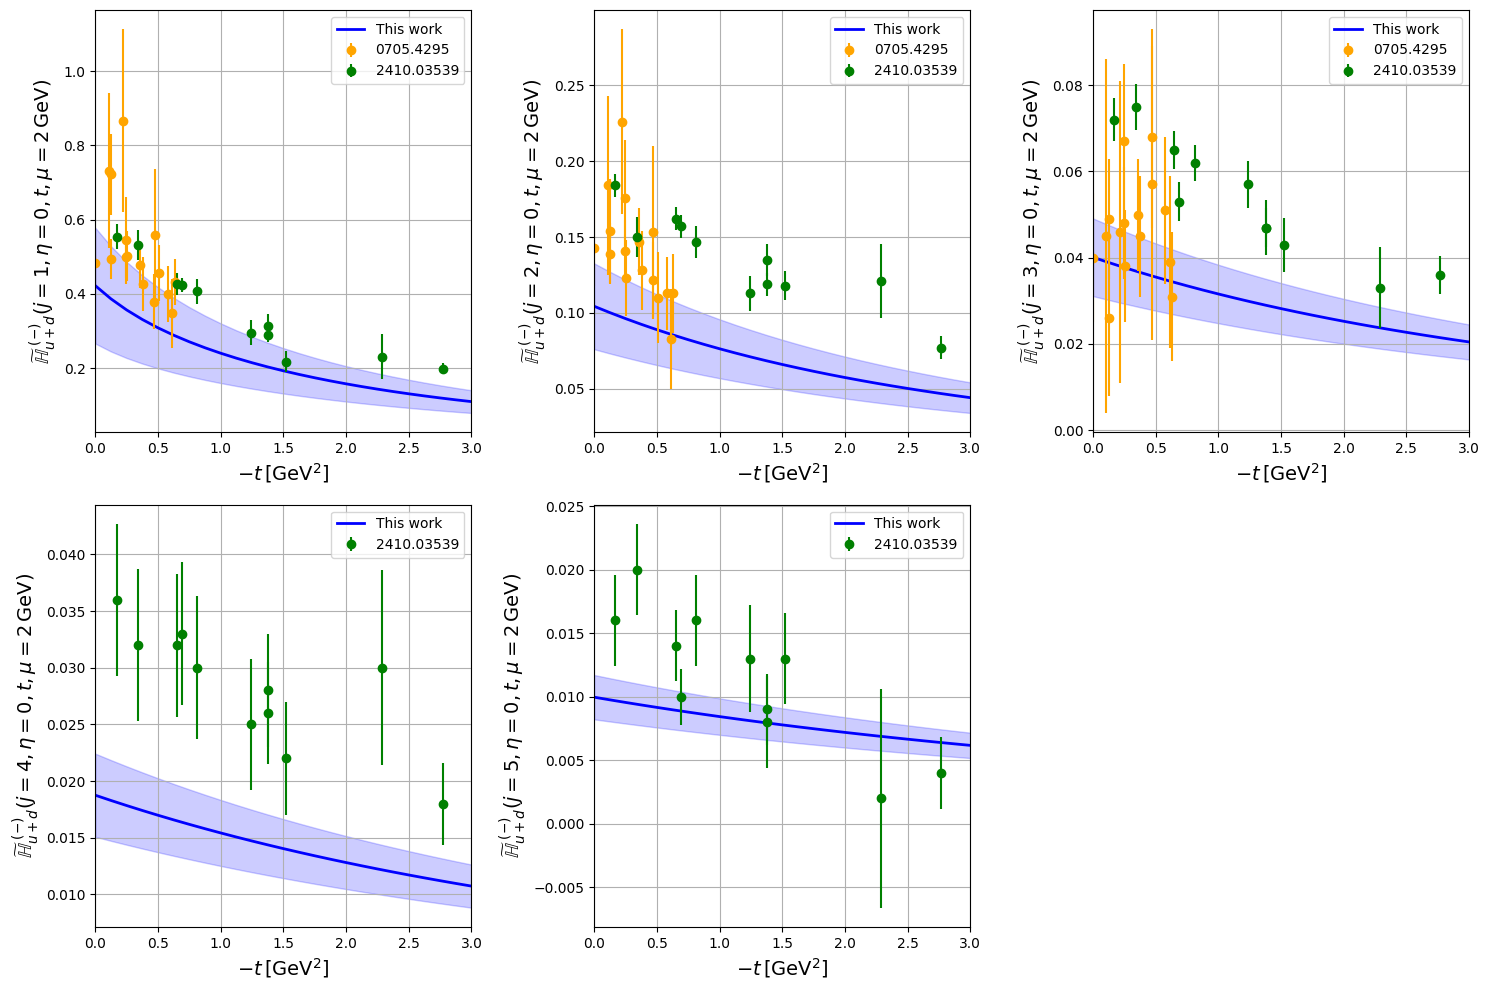

In [7]:
#non_singlet_isoscalar Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

In [3]:
from stringy_gpds import evolve_conformal_moment
A0q = 0.51/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="quark",evolution_order="NLO")
A0g = 0.501/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="gluon",evolution_order="NLO")
print(A0q,A0g)

0.7956252793777513 1.395265998443073


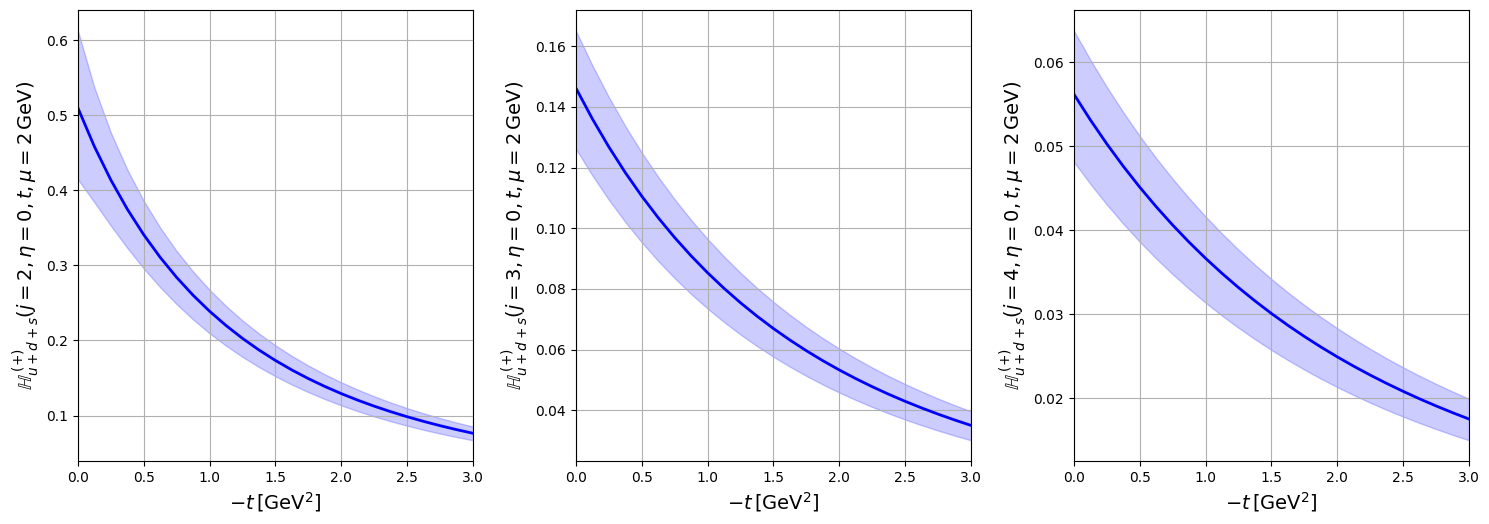

In [4]:
# Sea Quark singlet
y_label = "$\\mathbb{{H}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,A0q,"quark",moment_type, moment_label,"NLO",25)

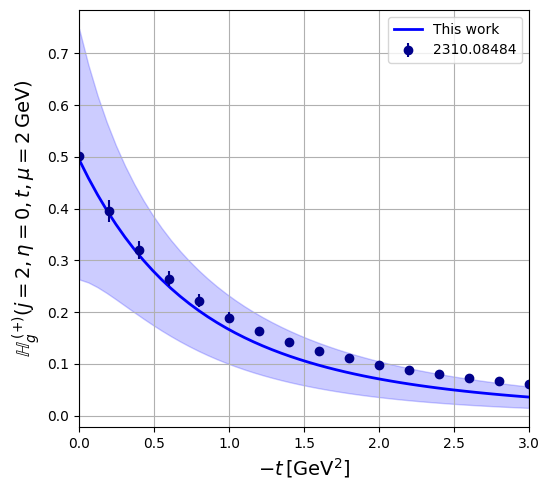

In [4]:
from stringy_gpds import plot_moments_on_grid
y_label = "$\\mathbb{{H}}_{{g}}^{{\,\,(+)}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,A0g,particle,moment_type,moment_label,evolution_order="NLO",n_t=50)

In [1]:
from stringy_gpds import evolve_singlet_D
D0g = -2.572/evolve_singlet_D(2,1,-1e-6,2,particle="gluon",moment_label="A",evolution_order="NLO")
D0q = -1.30/evolve_singlet_D(2,1,-1e-6,2,particle="quark",moment_label="A",evolution_order="NLO")
print(D0q,D0g)

0.7888364682781972 0.7287284712386682


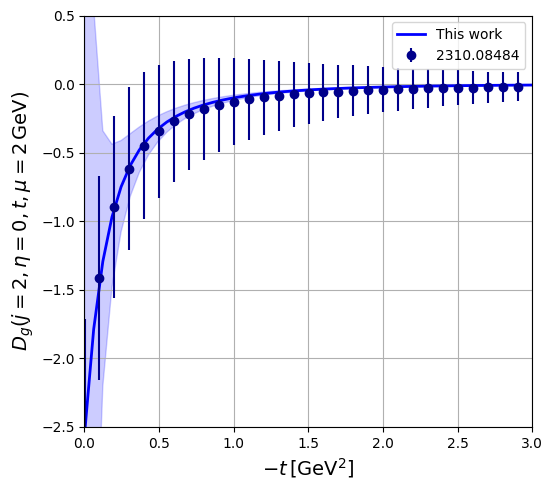

In [17]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(1,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

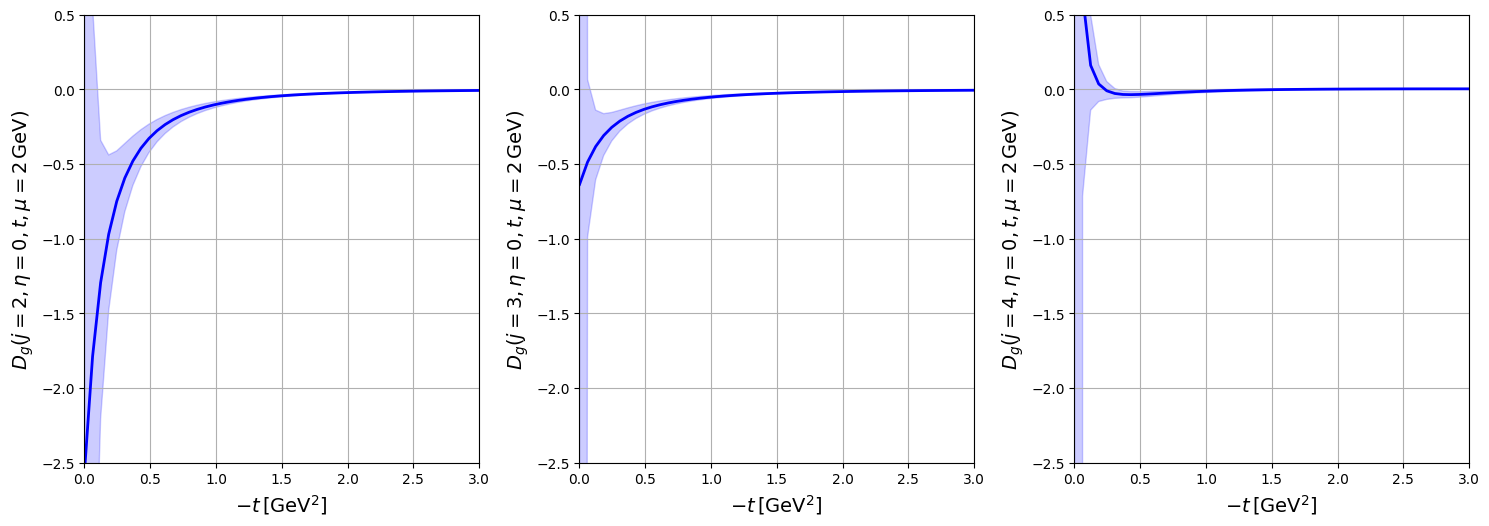

In [15]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(1,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

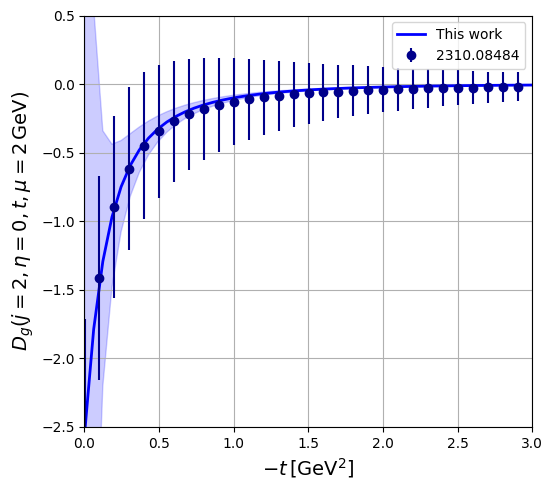

In [18]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

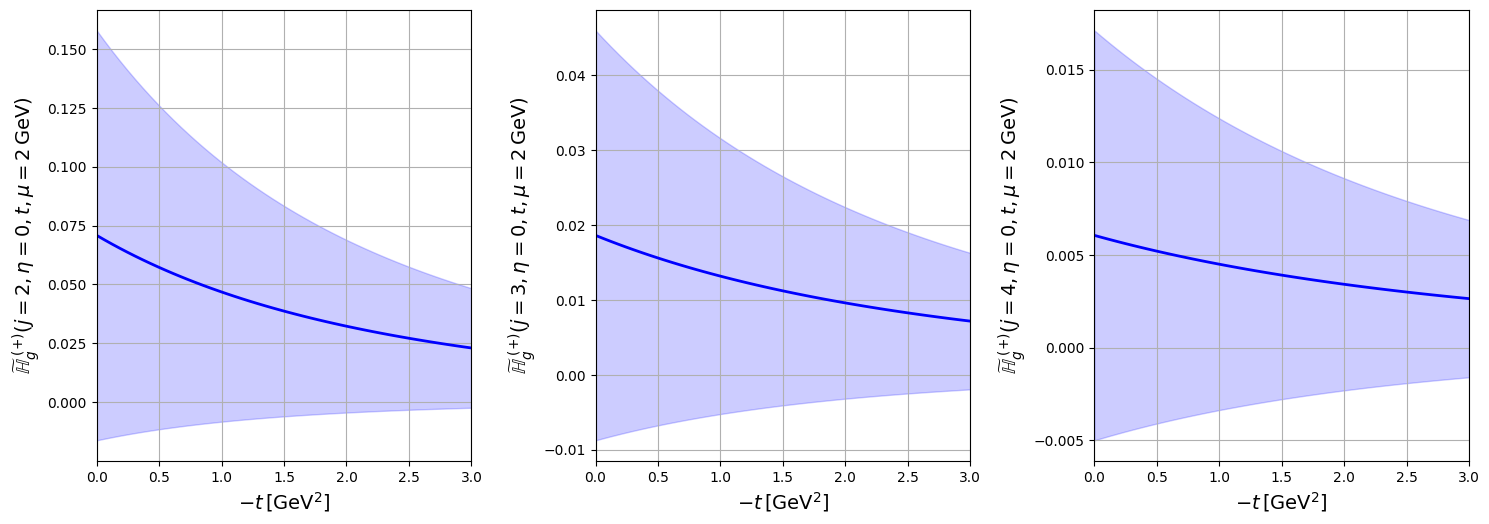

In [7]:
# Gluon singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{g}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"gluon",moment_type, moment_label,evolution_order="NLO")

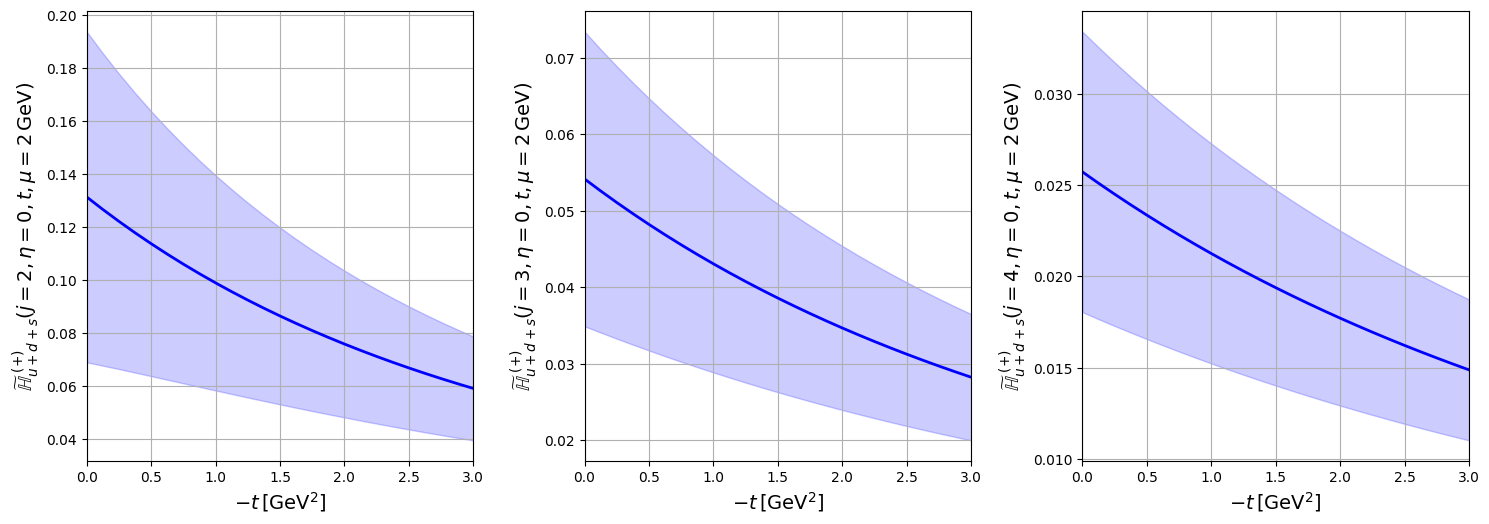

In [9]:
# Sea Quark singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

Plots of GPDs through Mellin-Barnes Integral

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.024125 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.022588 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.024590 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_Htilde.pdf


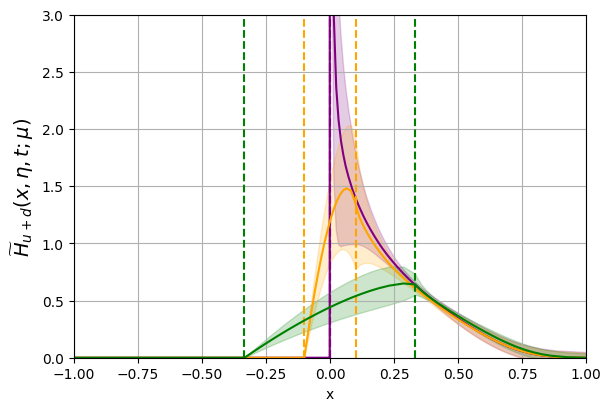

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="Htilde",read_from_file=True, write_to_file=False,y_0=0,y_1=3,plot_legend=False)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.036008 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.036237 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.039108 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_E.pdf


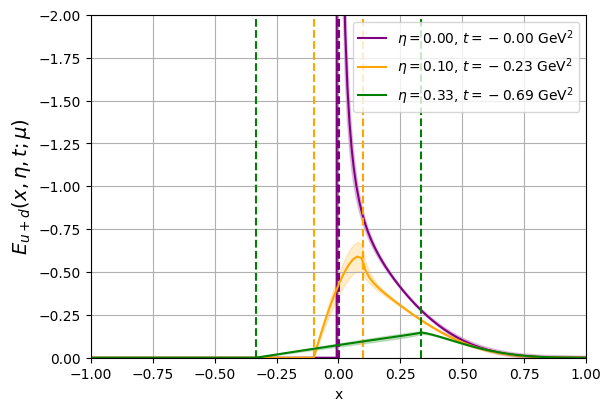

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=-2,plot_legend=True)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.049581 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.038945 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.030953 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/GPD/NonSingletIsovectorquarkGPD_E.pdf


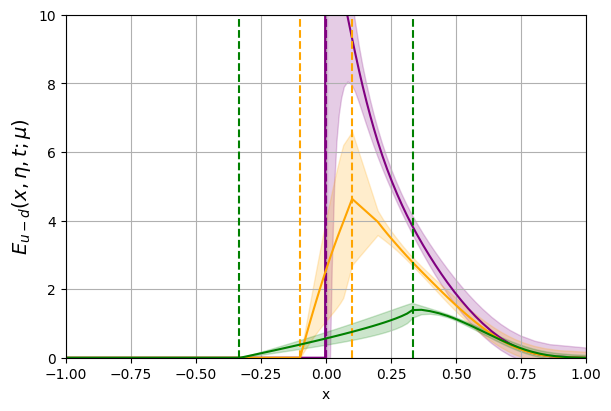

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=10)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.037388 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.026723 seconds
Time for plot computation for parameters (eta,t) = ((0.1, -0.23)): 0.027040 seconds


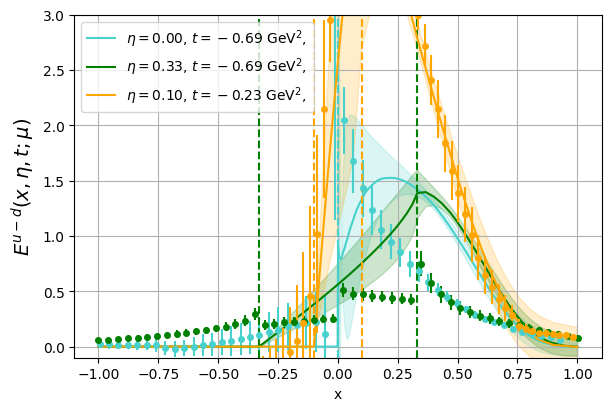

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True,write_to_file=False,plot_legend=True)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.031749 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.033551 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.39)): 0.033198 seconds


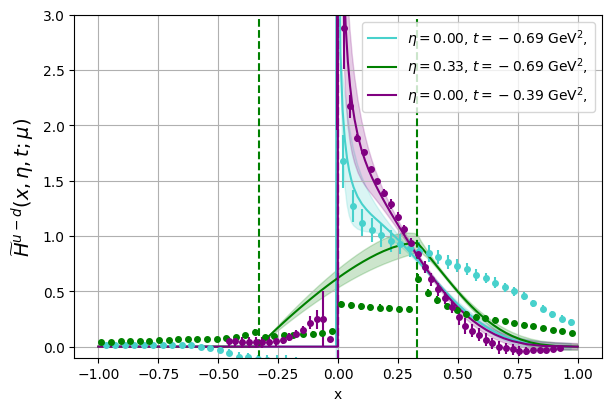

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="Htilde",read_from_file=True,write_to_file=False,plot_legend=True)